Question 2.1.a
Intercept: 21.788250882413028
Coefficient: -0.007025100276006444


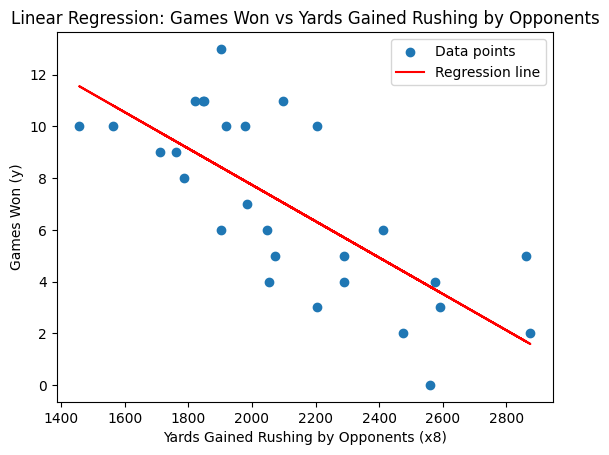


Question 2.1.b
              sum_sq    df          F    PR(>F)
x8        178.092314   1.0  31.103236  0.000007
Residual  148.871972  26.0        NaN       NaN
The regression is significant (p-value = 0.0000)

Question 2.1.c
95% Confidence Interval for the Slope of x8:
0   -0.009614
1   -0.004436
Name: x8, dtype: float64

Question 2.1.d
Percentage of Total Variability Explained by the Model: 54.47%

Question 2.1.e
95% Confidence Interval on the Mean Games Won (x8=2000):
Lower Bound: 7.74
Upper Bound: 7.74

Question 2.2

Point Estimate of Games Won (x8=1800): 9.14
90% Prediction Interval on Games Won:
Lower Bound: 9.14
Upper Bound: 9.14


In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Question 2.1.a)
# Create a DataFrame from your dataset
print("Question 2.1.a")
data = pd.read_csv('table_b_1.csv')

df = pd.DataFrame(data)

# Create the Linear Regression model
model = LinearRegression()

# Fit the model
X = df[['x8']]
y = df['y']
model.fit(X, y)

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

# Plot the data and regression line
plt.scatter(X, y, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('Yards Gained Rushing by Opponents (x8)')
plt.ylabel('Games Won (y)')
plt.title('Linear Regression: Games Won vs Yards Gained Rushing by Opponents')
plt.legend()
plt.show()

# Question 2.1.b)
print("\nQuestion 2.1.b")
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a model using Ordinary Least Squares (OLS)
model = ols('y ~ x8', data=df).fit()

# Create the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

# Extract the F-statistic and p-value for the regression
f_statistic = anova_table['F']['x8']
p_value = anova_table['PR(>F)']['x8']

# Test for the significance of the regression
alpha = 0.05
if p_value < alpha:
    print(f'The regression is significant (p-value = {p_value:.4f})')
else:
    print(f'The regression is not significant (p-value = {p_value:.4f})')

# Question 1.c)
print("\nQuestion 2.1.c")
# Calculate the 95% confidence interval for the slope
slope_ci = model.conf_int(alpha=0.05)

# Print the confidence interval for the slope (x8)
print(f'95% Confidence Interval for the Slope of x8:')
print(slope_ci.loc['x8'])

# Question 1.d)
print("\nQuestion 2.1.d")
# Calculate the total sum of squares (TSS)
y_mean = df['y'].mean()
tss = ((df['y'] - y_mean) ** 2).sum()

# Calculate the residual sum of squares (RSS)
rss = model.ssr

# Calculate R-squared (Coefficient of Determination)
r_squared = 1 - (rss / tss)

# Calculate the percentage of variability explained
percent_variability_explained = r_squared * 100

# Print the result
print(f"Percentage of Total Variability Explained by the Model: {percent_variability_explained:.2f}%")

# Question 2.1.e)
# Question 2.1.e
print("\nQuestion 2.1.e")
import numpy as np
from scipy.stats import t

# Specify the value of x8 (opponents' yards rushing)
x8_value = 2000

# Predict the mean number of games won for the specified x8 value
mean_games_won = model.predict({'x8': [x8_value]})[0]

# Get the standard error of the mean prediction
n = len(df)
x8_mean = df['x8'].mean()
std_error = model.bse['x8'] * np.sqrt(1/n + (x8_value - x8_mean)**2 / ((n-1) * x8_std**2))

# Calculate the t-score for a 95% confidence interval (two-tailed)
alpha = 0.05
t_score = np.abs(t.ppf(1 - alpha / 2, df=n-2))  # Using t.ppf from SciPy

# Calculate the margin of error
margin_of_error = t_score * std_error

# Calculate the confidence interval
lower_ci = mean_games_won - margin_of_error
upper_ci = mean_games_won + margin_of_error

# Print the confidence interval
print(f"95% Confidence Interval on the Mean Games Won (x8={x8_value}):")
print(f"Lower Bound: {lower_ci:.2f}")
print(f"Upper Bound: {upper_ci:.2f}")

# Question 2.2
print("\nQuestion 2.2\n")
# Specify the value of x8 (opponents' yards rushing) for prediction
x8_value_to_predict = 1800

# Predict the number of games won for the specified x8 value
predicted_games_won = model.predict({'x8': [x8_value_to_predict]})[0]

# Calculate the standard error for the prediction interval
prediction_std_error = std_error * np.sqrt(1 + 1/n + (x8_value_to_predict - x8_mean)**2 / ((n-1) * x8_std**2))

# Calculate the t-score for a 90% prediction interval (two-tailed)
alpha = 0.10  # 90% prediction interval, so alpha = 0.10
t_score = np.abs(t.ppf(1 - alpha / 2, df=n-2))  # Using t.ppf from SciPy

# Calculate the margin of error for prediction interval
prediction_margin_of_error = t_score * prediction_std_error

# Calculate the prediction interval
lower_prediction_bound = predicted_games_won - prediction_margin_of_error
upper_prediction_bound = predicted_games_won + prediction_margin_of_error

# Print the point estimate and the 90% prediction interval
print(f"Point Estimate of Games Won (x8={x8_value_to_predict}): {predicted_games_won:.2f}")
print(f"90% Prediction Interval on Games Won:")
print(f"Lower Bound: {lower_prediction_bound:.2f}")
print(f"Upper Bound: {upper_prediction_bound:.2f}")



Question 2.2

Point Estimate of Games Won (x8=1800): 9.14
90% Prediction Interval on Games Won:
Lower Bound: 9.14
Upper Bound: 9.14
